In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('C:/Users/shett/PycharmProjects/PythonTutorial/MachineLearning/Loan_Prediction_train.csv')

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Test Data:

In [51]:
test_data = pd.read_csv('C:/Users/shett/PycharmProjects/PythonTutorial/MachineLearning/Loan_Prediction_test.csv')

In [52]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [25]:
train_data.shape,test_data.shape

((614, 13), (367, 12))

In [22]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [24]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [28]:
train_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [31]:
train_data['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

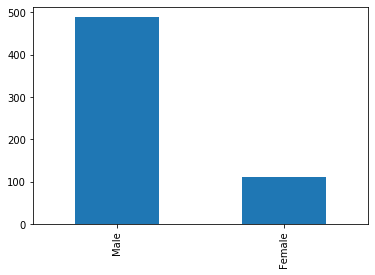

In [38]:
train_data['Gender'].value_counts().plot.bar()

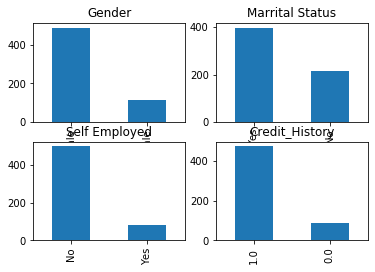

In [51]:
plt.figure(1); plt.subplot(221); train_data['Gender'].value_counts().plot.bar(title='Gender') 
plt.subplot(222); train_data['Married'].value_counts().plot.bar(title='Marrital Status')
plt.subplot(223); train_data['Self_Employed'].value_counts().plot.bar(title='Self Employed')
plt.subplot(224); train_data['Credit_History'].value_counts().plot.bar(title='Credit_History')
plt.show()

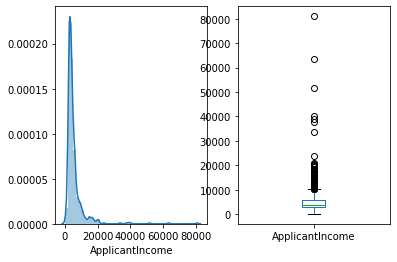

In [55]:
plt.figure(1); plt.subplot(121); sns.distplot(train_data['ApplicantIncome'])
plt.subplot(122); train_data['ApplicantIncome'].plot.box()

Text(0.5, 0.98, '')

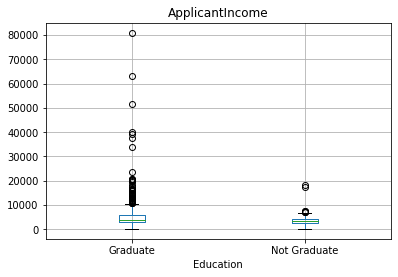

In [60]:
train_data.boxplot(column="ApplicantIncome", by='Education'); plt.suptitle("")

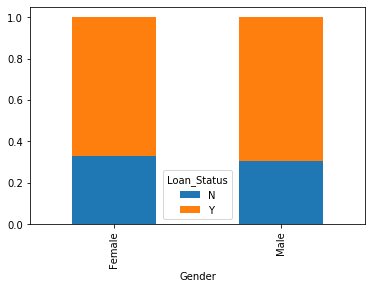

In [68]:
Gender = pd.crosstab(train_data['Gender'],train_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot.bar(stacked=True)

## Here , the div function will divide the dataset and Dependent.sum(1) with axis will sum the row value to 1

In [79]:
Dependent = pd.crosstab(train_data['Dependents'],train_data['Loan_Status'])
Dependent.div(Dependent.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Dependents,,
0,0.310145,0.689855
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059


In [73]:
pd.crosstab(train_data['Dependents'],train_data['Loan_Status'])

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


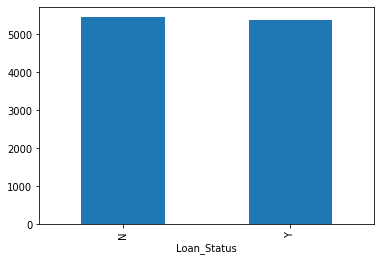

In [9]:
train_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [14]:
type(train_data.groupby('Loan_Status')['ApplicantIncome'].mean())

pandas.core.series.Series

In [15]:
bins=[0,2500,4000,6000,81000]
groups=['Low','Average','High','Very High']

In [17]:
train_data['Income_bin']=pd.cut(train_data['ApplicantIncome'],bins,labels=groups)

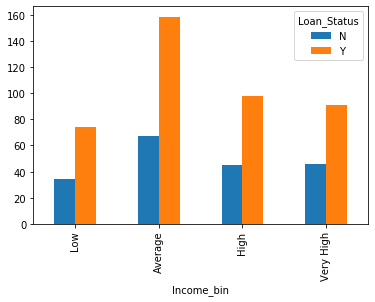

In [23]:
pd.crosstab(train_data['Income_bin'],train_data['Loan_Status']).plot.bar()

In [25]:
Income_bin = pd.crosstab(train_data['Income_bin'],train_data['Loan_Status'])

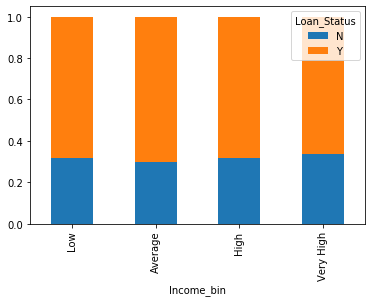

In [31]:
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)

In [32]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin'],
      dtype='object')

In [36]:
train_data.drop(['Income_bin'],axis=1,inplace=True)

In [39]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [42]:
train_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [53]:
train_data['Dependents'].replace('3+',3,inplace=True)
test_data['Dependents'].replace('3+',3,inplace=True)

In [55]:
train_data['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [57]:
train_data['Loan_Status'].replace('Y',1,inplace=True)

In [59]:
train_data['Loan_Status'].replace('N',0,inplace=True)

In [61]:
train_data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
train_datatea